In [1]:
# 주요 라이브러리 import
import warnings
warnings.filterwarnings(action='ignore')
import time
from IPython.display import Image
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.metrics import *

from matplotlib import rc, font_manager
import matplotlib.font_manager as fm
from sklearn.preprocessing import StandardScaler

from sklearn.preprocessing import MinMaxScaler

In [2]:
# 디렉토리 및 파일 이름에 맞추어 변경
# font_location = '/Library/Fonts/Arial Unicode.ttf'#윈도우안에있는 폰트파일주소.
font_location = '../data04/NanumGothic.ttf'
font_name = fm.FontProperties(fname=font_location).get_name()
rc('font', family=font_name)

In [3]:
bsp = pd.read_csv('./basketball_stat.csv', encoding='utf-8')
bsp

,Player,Pos,3P,2P,TRB,AST,STL,BLK
0,Alex Abrines,SG,1.4,0.6,1.3,0.6,0.5,0.1
1,Steven Adams,C,0.0,4.7,7.7,1.1,1.1,1.0
2,Alexis Ajinca,C,0.0,2.3,4.5,0.3,0.5,0.6
3,Chris Andersen,C,0.0,0.8,2.6,0.4,0.4,0.6
4,Will Barton,SG,1.5,3.5,4.3,3.4,0.8,0.5
...,...,...,...,...,...,...,...,...
95,Nikola Vucevic,C,0.3,6.1,10.4,2.8,1.0,1.0
96,Dwyane Wade,SG,0.8,6.2,4.5,3.8,1.4,0.7
97,Dion Waiters,SG,1.8,4.3,3.3,4.3,0.9,0.4
98,Hassan Whiteside,C,0.0,7.0,14.1,0.7,0.7,2.1


Text(0.5, 1.0, 'STL and 2P')

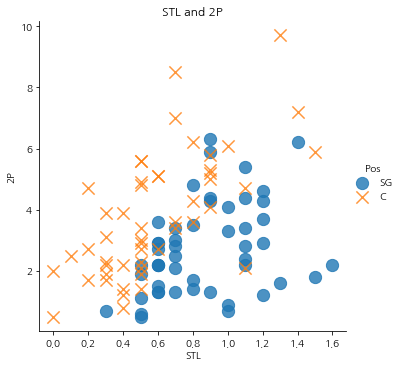

In [4]:
sns.lmplot('STL', '2P', data=bsp, fit_reg=False,
               scatter_kws={'s' : 150},
               markers=['o', 'x'],
               hue = 'Pos'
          )
plt.title('STL and 2P')

Text(0.5, 1.0, 'AST and 2P')

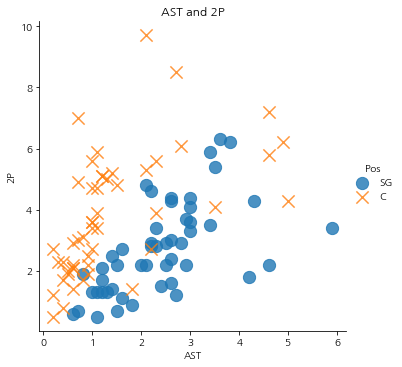

In [5]:
sns.lmplot('AST', '2P', data=bsp, fit_reg=False,
               scatter_kws={'s' : 150},
               markers=['o', 'x'],
               hue = 'Pos'
          )
plt.title('AST and 2P')

Text(0.5, 1.0, '3P and BLK')

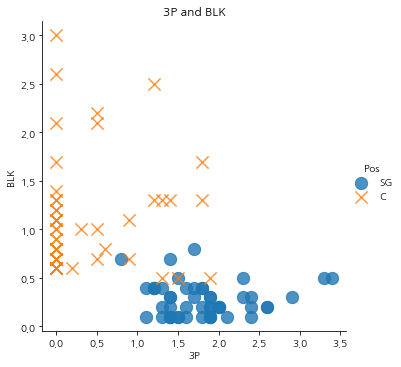

In [6]:
sns.lmplot('3P', 'BLK', data=bsp, fit_reg=False,
               scatter_kws={'s' : 150},
               markers=['o', 'x'],
               hue = 'Pos'
          )
plt.title('3P and BLK')

Text(0.5, 1.0, '3P and TRB')

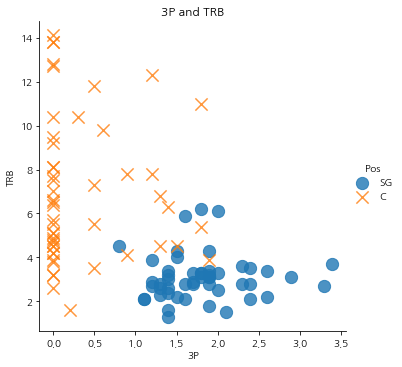

In [7]:
sns.lmplot('3P', 'TRB', data=bsp, fit_reg=False,
               scatter_kws={'s' : 150},
               markers=['o', 'x'],
               hue = 'Pos'
          )
plt.title('3P and TRB')

In [8]:
bsp.columns

Index(['Player', 'Pos', '3P', '2P', 'TRB', 'AST', 'STL', 'BLK'], dtype='object')

In [9]:
bsp.drop(['2P',  'AST', 'STL'], axis=1, inplace=True)

In [10]:
bsp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Player  100 non-null    object 
 1   Pos     100 non-null    object 
 2   3P      100 non-null    float64
 3   TRB     100 non-null    float64
 4   BLK     100 non-null    float64
dtypes: float64(3), object(2)
memory usage: 4.0+ KB


In [11]:
bsp.describe()

,3P,TRB,BLK
count,100.00000,100.000000,100.00000
mean,1.08200,5.030000,0.69600
std,0.91424,3.098599,0.59661
min,0.00000,1.300000,0.10000
25%,0.00000,2.875000,0.20000
50%,1.30000,3.900000,0.55000
75%,1.80000,6.325000,1.00000
max,3.40000,14.100000,3.00000


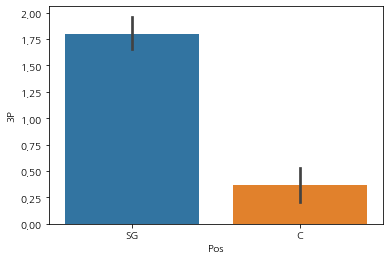

In [12]:
sns.barplot(bsp['Pos'], bsp['3P'])

In [13]:
# 전체 na 개수
print(bsp.isna().sum())
print('---------------------')
print(bsp.isna().sum())

Player    0
Pos       0
3P        0
TRB       0
BLK       0
dtype: int64
---------------------
Player    0
Pos       0
3P        0
TRB       0
BLK       0
dtype: int64


In [14]:
bsp.columns

Index(['Player', 'Pos', '3P', 'TRB', 'BLK'], dtype='object')

In [15]:
# train, test split
# train = pd.read_csv("https://raw.githubusercontent.com/wikibook/machine-learning/2.0/data/csv/basketball_train.csv")
# test = pd.read_csv("https://raw.githubusercontent.com/wikibook/machine-learning/2.0/data/csv/basketball_test.csv")

In [16]:
X_train, X_test, Y_train, Y_test = train_test_split(
            bsp.iloc[:, 2:], #문제(설명변수 3개, 인덱스 2~끝),
            bsp.iloc[:, 1], #정답(종속변수 1개, target, 인덱스 1)
            test_size=0.2, #테스트 비율,
            random_state=42#랜덤 시드값
)

In [17]:
X_train.shape

(80, 3)

In [18]:
Y_train.shape

(80,)

In [19]:
X_test.shape

(20, 3)

In [20]:
Y_test.shape

(20,)

In [21]:
# 모델 선정 ==> cross-validation(교차검증)
# knn, svm, descision tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

In [22]:
model_list=[]
knn = KNeighborsClassifier()
svm = SVC()
dt = DecisionTreeClassifier()
model_list = [knn, svm, dt]

In [23]:
model_list

[KNeighborsClassifier(), SVC(), DecisionTreeClassifier()]

In [24]:
# 모델 실행 함수화
def print_cv(model, train, test, k):
    scores = cross_val_score(model, train, test, cv = k)
    print('-----------교차 검증(cv) 결과---------------', scores)
    mean_scores = np.mean(scores)
    print('-----------교차 검증(cv) 평균 결과---------------', mean_scores)
    return scores, mean_scores

# 함수의 결과로 여러 개의 데이터를 return할 수 있다
# 튜플로 묶어서 반환하게 된다. (scores, mean_scores)

In [25]:
# cv_result = print_cv() # cv_result는 tuple이 저장 (scores, mean_scores)
# index_0 = print_cv(0)
# index_1 = print_cv(1)

In [26]:
# index_0, index_1 = print_cv()

In [27]:
# k = 5, 전체 몇 번의 교차검증을 하게 될까요?
# model_n:3 * k = 5 ==> total_n = 15

In [28]:
model_names = ['KNeighborsClassifier()', 'SVC()', 'DecisionTreeClassifier()']
sc_list = []
mean_sc_list =[]
for model in model_list:
    sc, mean_sc = print_cv(model, X_train, Y_train, 5)
    sc_list.append(sc)
    mean_sc_list.append(mean_sc)
print('\n**********************************************')
print('-------전체 모델 리스트-------')
print(model_names)
print('-------전체 모델의 교차검증 결과 리스트-------')
print(sc_list)
print('-------전체 모델의 교차검증 결과 평균-------')
print(mean_sc_list)

-----------교차 검증(cv) 결과--------------- [0.9375 0.8125 0.8125 0.875  1.    ]
-----------교차 검증(cv) 평균 결과--------------- 0.8875
-----------교차 검증(cv) 결과--------------- [0.875  0.875  0.8125 0.9375 1.    ]
-----------교차 검증(cv) 평균 결과--------------- 0.9
-----------교차 검증(cv) 결과--------------- [0.9375 1.     0.875  0.875  1.    ]
-----------교차 검증(cv) 평균 결과--------------- 0.9375

**********************************************
-------전체 모델 리스트-------
['KNeighborsClassifier()', 'SVC()', 'DecisionTreeClassifier()']
-------전체 모델의 교차검증 결과 리스트-------
[array([0.9375, 0.8125, 0.8125, 0.875 , 1.    ]), array([0.875 , 0.875 , 0.8125, 0.9375, 1.    ]), array([0.9375, 1.    , 0.875 , 0.875 , 1.    ])]
-------전체 모델의 교차검증 결과 평균-------
[0.8875, 0.9, 0.9375]


In [29]:
# 시각화해서 비교해보기

(array([1., 0., 1., 0., 0., 0., 0., 0., 0., 1.]),
 array([0.8875, 0.8925, 0.8975, 0.9025, 0.9075, 0.9125, 0.9175, 0.9225,
        0.9275, 0.9325, 0.9375]),
 <a list of 10 Patch objects>)

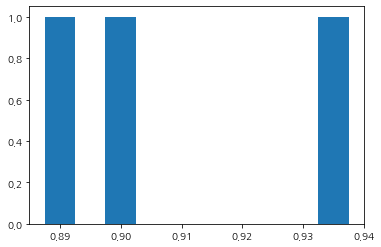

In [30]:
plt.hist(mean_sc_list)

In [31]:
# 교차검증 결과 Decision Tree를 사용해서 테스트 해보기로 결정함

[**DecisionTreeClassifier**]

https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html

<img src="https://github.com/aliciawill/python-data/blob/master/data12/dt_params.png?raw=true" width="800" height="800">

<img src="https://camo.githubusercontent.com/efc8400119de0a5389f9ab87d13b065a385cefea780c75514b85bfb5223769f6/68747470733a2f2f7363696b69742d6c6561726e2e6f72672f737461626c652f5f696d616765732f737068785f676c725f706c6f745f726f635f3030322e706e67">

In [32]:
# 하이퍼 파라메터 --> grid search

In [33]:
params = { # 하이퍼 파라메터 설정으로 가질 수 있는 모든 경우의 수 ==> 4 * 3 * 2 : 24개의 경우의 수
    'max_depth' : [3, 5, 7, 10], # key: 하이퍼 파라메터명, values는 list타입이어야 함
    'random_state' : [1, 3, 5],
    'criterion' : ['gini', 'entropy'] # 혼란스러운 정도 (분류의 정도)를 계산하는 기준 
}

<img src="https://github.com/aliciawill/python-data/blob/master/data12/fun_params_show2.png?raw=true">

In [34]:
def grid_search(model, params, k):
    gs_model = GridSearchCV(model, params, cv = k)
    ## gs_model는 최적의 파라메터가 적용된 모델의 객체!
    gs_model.fit(X_train, Y_train)
    print('best_estimator :', gs_model.best_estimator_) # 최적의 파라메터가 적용된 모델 객체
    print('------------------------------------------')
    print('best_score :', gs_model.best_score_) # 최적의 파라메터가 적용된 모델로 학습한 정확도 결과(accuracy)
    print('------------------------------------------')
    print('best_params :', gs_model.best_params_) # 그리드 서치를 통해 찾은 최적의 파라메터
    print('------------------------------------------')
    print(gs_model) # grid_search 객체

In [35]:
# 함수의 모든 파라메터를 보고 싶으면 함수명 쓰고 shift_tab
grid_search(dt, params, 5) # grid_search의 모든 경우의 수는 24*5

best_estimator : DecisionTreeClassifier(max_depth=3, random_state=1)
------------------------------------------
best_score : 0.95
------------------------------------------
best_params : {'criterion': 'gini', 'max_depth': 3, 'random_state': 1}
------------------------------------------
GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 5, 7, 10],
                         'random_state': [1, 3, 5]})


In [36]:
# --> grid_search를 통해 찾은 최적의 파라메터는 
#    {'criterion': 'gini', 'max_depth': 3, 'random_state': 1}

In [37]:
# 최적의 하이퍼 파라메터로 모델 객체 생성
# fit()
dt_gs = DecisionTreeClassifier(criterion = 'gini', max_depth = 3, random_state = 1)
dt_gs.fit(X_train, Y_train)

DecisionTreeClassifier(max_depth=3, random_state=1)

In [38]:
# test 데이터로 검증해보자!
def test_validation(model, X_test, Y_test):
    predict_result = model.predict(X_test)
    acc = accuracy_score(Y_test, predict_result)
    print('accuracy >>', acc)
    cf = confusion_matrix(Y_test, predict_result)
    # 실제(c) --> 예측(c, sg), 실제(sg) --> 예측(sg, c)
    # 이진분류(binary classification)인 경우에는
    # 예측할 수 있는 경우의 수는 4가지
    # 4가지를 표 형태로 정리해주는 것이 confusion_matrix
    # 첫번째 행/열은 c, 두번째 행/열은 sg, abc 순으로 행/열이 결정
    print('confusion_matrix >> \n', cf)
    # confusion_matrix는 binary classification인 경우에는 보기가 괜찮으나,
    # multi class classification인 경우에는 보기가 힘들다
    c_report = classification_report(Y_test, predict_result)
    print('classification_report >> \n', c_report)

In [47]:
test_validation(dt_gs, X_test, Y_test)

accuracy >> 0.95
confusion_matrix >> 
 [[10  0]
 [ 1  9]]
classification_report >> 
               precision    recall  f1-score   support

           C       0.91      1.00      0.95        10
          SG       1.00      0.90      0.95        10

    accuracy                           0.95        20
   macro avg       0.95      0.95      0.95        20
weighted avg       0.95      0.95      0.95        20



In [40]:
# c는 10개를 다 맞춤, sg는 9개를 맞추고, 1개를 c로 예측함(틀림)
# 정확도가 95%가 나왔음
# acc = (10 + 9) / (10 + 0 + 9 + 1)
# 정확도 = 실제 c:예측 c + 실제 sg:예측 sg / 실제 c:예측 c + 실제 sg:예측 sg + 실제 c:예측 sg + 실제 sg:예측 c

In [ ]:
pp.title("Precision-Recall Graph")
pp.xlabel("Recall" )
pp.ylabel("Precision")
pp.plot(modelARecallRateNDArray, modelAPrecisionNDArray, "b", label = "Model A (AP = %0.2F)" % modelAAP)
pp.plot(modelBRecallRateNDArray, modelBPrecisionNDArray, "g", label = "Model B (AP = %0.2F)" % modelBAP)
pp.legend(loc = "upper right")
pp.show()

In [41]:
## recall
# 실제 C중에서, 예측한 값들을 보면 실제 C로 100% 정확하게 예측해냈고, SG로 예측한 것은 없다.
# 실제 SG중에서, 예측한 값들을 보면 실제 SG로 예측한 것이 90%이고, C로 예측한 것이 10%이다.

## precision
# 예측한 C중에서 실제 91%가 C였고, SG는 89%이다.
# 예측한 SG중에서 실제 100%가 SG였고, C는 없었다.

In [42]:
Y_test.value_counts()

SG    10
C     10
Name: Pos, dtype: int64

In [43]:
# 정확도 체크, acc, recall, precision, f1-score
# confusion matrix(혼동행렬)